<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Reading-and-Exploring-the-Data" data-toc-modified-id="Reading-and-Exploring-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading and Exploring the Data</a></span><ul class="toc-item"><li><span><a href="#Overview-from-the-Data" data-toc-modified-id="Overview-from-the-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Overview from the Data</a></span></li><li><span><a href="#Initial-Prep" data-toc-modified-id="Initial-Prep-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Initial Prep</a></span></li></ul></li><li><span><a href="#Graphical-Exploration" data-toc-modified-id="Graphical-Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Graphical Exploration</a></span><ul class="toc-item"><li><span><a href="#Restaurants-Overview" data-toc-modified-id="Restaurants-Overview-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Restaurants Overview</a></span></li><li><span><a href="#Restaurants-Services" data-toc-modified-id="Restaurants-Services-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Restaurants Services</a></span></li><li><span><a href="#Where-Are-the-Good-Ones?" data-toc-modified-id="Where-Are-the-Good-Ones?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Where Are the Good Ones?</a></span></li><li><span><a href="#Zomato-Customers-Preferences" data-toc-modified-id="Zomato-Customers-Preferences-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Zomato Customers Preferences</a></span></li><li><span><a href="#Food-Options" data-toc-modified-id="Food-Options-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Food Options</a></span></li></ul></li><li><span><a href="#Predicting-the-Success-of-a-Restaurant" data-toc-modified-id="Predicting-the-Success-of-a-Restaurant-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Predicting the Success of a Restaurant</a></span><ul class="toc-item"><li><span><a href="#Target-Definition" data-toc-modified-id="Target-Definition-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Target Definition</a></span></li><li><span><a href="#Feature-Extraction" data-toc-modified-id="Feature-Extraction-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature Extraction</a></span></li><li><span><a href="#Encoding" data-toc-modified-id="Encoding-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Encoding</a></span></li><li><span><a href="#Pipeline" data-toc-modified-id="Pipeline-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Pipeline</a></span></li><li><span><a href="#Training-a-Model" data-toc-modified-id="Training-a-Model-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Training a Model</a></span></li></ul></li><li><span><a href="#Conclusion-+-Production-Script" data-toc-modified-id="Conclusion-+-Production-Script-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion + Production Script</a></span></li></ul></div>

In this notebook we will go trough a complete Data Analysis on Zomato Bengalore Restaurants dataset available on [Kaggle](https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants). The goal of this project is to provide decision power for decision makers when looking at informations about Bengalore restaurants. For this we can:

- Get intuition about the data;
- Document an exploratory data analysis;
- Point out conclusions in every step of analysis;
- Use graphical modules (matplotlib and seaborn) to answear questions;
- Apply a predictive point of view for helping people to choose the best restaurant.

# Libraries

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
from collections import Counter
from PIL import Image

# Viz libs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid.inset_locator import InsetPosition
import folium
from folium.plugins import HeatMap, FastMarkerCluster
from wordcloud import WordCloud

# Geolocation libs
from geopy.geocoders import Nominatim

# Utils modules
from utils.custom_transformers import *
from utils.viz_utils import *
from utils.ml_utils import *

# ML libs
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import shap

C:\Users\thipa\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from ipykernel import kernelapp as app


# Reading and Exploring the Data

In [2]:
# Reading restaurants data
data_path = r'D:\Users\thiagoPanini\Documents\Datasets\kaggle_ZomatoRestaurants\zomato.csv'
df_restaurants = import_data(path=data_path, n_lines=5000)

# Results
print(f'Dataset shape: {df_restaurants.shape}')
df_restaurants.head()

O dataset possui 17 colunas, das quais 1 são elegíveis a otimização.

----------------------------------------------------
Memória RAM utilizada (5000 linhas): 0.6486 MB
Memória RAM após otimização (5000 linhas): 0.6295 MB
----------------------------------------------------

Ganho de 2.94% em uso de memória!

Dataset shape: (51717, 17)


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

By looking at the dataset page on Kaggle, it's possible to see the meaning of each columns of the data. Just to allign the concepts, we have:

* **_url:_** contains the url of the restaurant in the zomato website;
* **_address:_** contains the address of the restaurant in Bengaluru;
* **_name:_** contains the name of the restaurant;
* **_online-order:_** whether online ordering is available in the restaurant or not;
* **_book-table:_** table book option available or not;
* **_rate:_** contains the overall rating of the restaurant out of 5;
* **_votes:_** contains total number of rating for the restaurant as of the above mentioned date;
* **_phone:_** contains the phone number of the restaurant;
* **_location:_** contains the neighborhood in which the restaurant is located;
* **_rest-type:_** restaurant type.

We don't have explanation for some columns like **_dish-liked_**, **_approx-cost(for two people)_** and others but its meaning can be extracted by looking at the dataset head above. As long as we look at those initial rows, we can see either the need of transformation on some columns like **_rate_** for example (we will talk about this in the future).

## Overview from the Data

Once read the data, let's now use a homemade implementation to extract useful information about the dataset.

In [3]:
# An overview from the data
df_overview = data_overview(df_restaurants)
df_overview

feature  qtd_null  percent_null   dtype  qtd_cat
0                    dish_liked     28078      0.542916  object     5271
1                          rate      7775      0.150337  object       64
2                         phone      1208      0.023358  object    14926
3   approx_cost(for two people)       346      0.006690  object       70
4                     rest_type       227      0.004389  object       93
5                      cuisines        45      0.000870  object     2723
6                      location        21      0.000406  object       93
7               listed_in(type)         0      0.000000  object        7
8                     menu_item         0      0.000000  object     9098
9                  reviews_list         0      0.000000  object    22513
10                          url         0      0.000000  object    51717
11                      address         0      0.000000  object    11495
12                        votes         0      0.000000   int32        0
13                   book_table         0      0.000000  object        2
14                 online_order         0      0.000000  object        2
15                         name         0      0.000000  object     8792
16              listed_in(city)         0      0.000000  object       30

## Initial Prep

Well, after reading the data and taking a look at its characteristics, we can now do a hands on to apply some preparation steps. As we said right above, there are some columns that could be threated better. Let's point in topics we will do right now:

* **approx_cost(for two people):**
    - Change the data type from object to float;
    

* **rate:**
    - Let's eliminate the "/5" text and change data type from object to float

In [4]:
# Changing the data type from approx_cost columns
df_restaurants['approx_cost'] = df_restaurants['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', ''))
df_restaurants['approx_cost'] = df_restaurants['approx_cost'].astype(float)

# Extracting the rate in a float column
df_restaurants['rate_num'] = df_restaurants['rate'].astype(str).apply(lambda x: x.split('/')[0])
while True:
    try:
        df_restaurants['rate_num'] = df_restaurants['rate_num'].astype(float)
        break
    except ValueError as e1:
        noise_entry = str(e1).split(":")[-1].strip().replace("'", "")
        print(f'Threating noisy entrance on rate: {noise_entry}')
        df_restaurants['rate_num'] = df_restaurants['rate_num'].apply(lambda x: x.replace(noise_entry, str(np.nan)))

# Dropping old columns
df_restaurants.drop(['approx_cost(for two people)', 'rate'], axis=1, inplace=True)
df_restaurants.head()

Threating noisy entrance on rate: NEW
Threating noisy entrance on rate: -


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  votes                             phone  \
0          Yes        Yes    775    080 42297555\r\n+91 9743772233   
1          Yes         No    787                      080 41714161   
2          Yes         No    918                    +91 9663487993   
3           No         No     88                    +91 9620009302   
4           No         No    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  \
0  North Indian, Mughlai, Chinese   
1     Chinese, North Indian, Thai   
2          Cafe, Mexican, Italian   
3      South Indian, North Indian   
4        North Indian, Rajasthani   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  approx_cost  rate_num  
0          Buffet    Banashankari        800.0       4.1  
1          Buffet    Banashankari        800.0       4.1  
2          Buffet    Banashankari        800.0       3.8  
3          Buffet    Banashankari        300.0       3.7  
4          Buffet    Banashankari        600.0       3.8

# Graphical Exploration

In this session, let's present useful charts that could be used to get intuition about the data. We will divide the exploratory data analysis into topics to help the users take their own conclusions. In each topic, we will also try to purpose questions that can be answeared with some graphic or table analysis.

## Restaurants Overview

In this topic, let's make an initial analysis on our data looking at restaurant's features presented in it.

___
* _How many types of restaurants we have?_
___

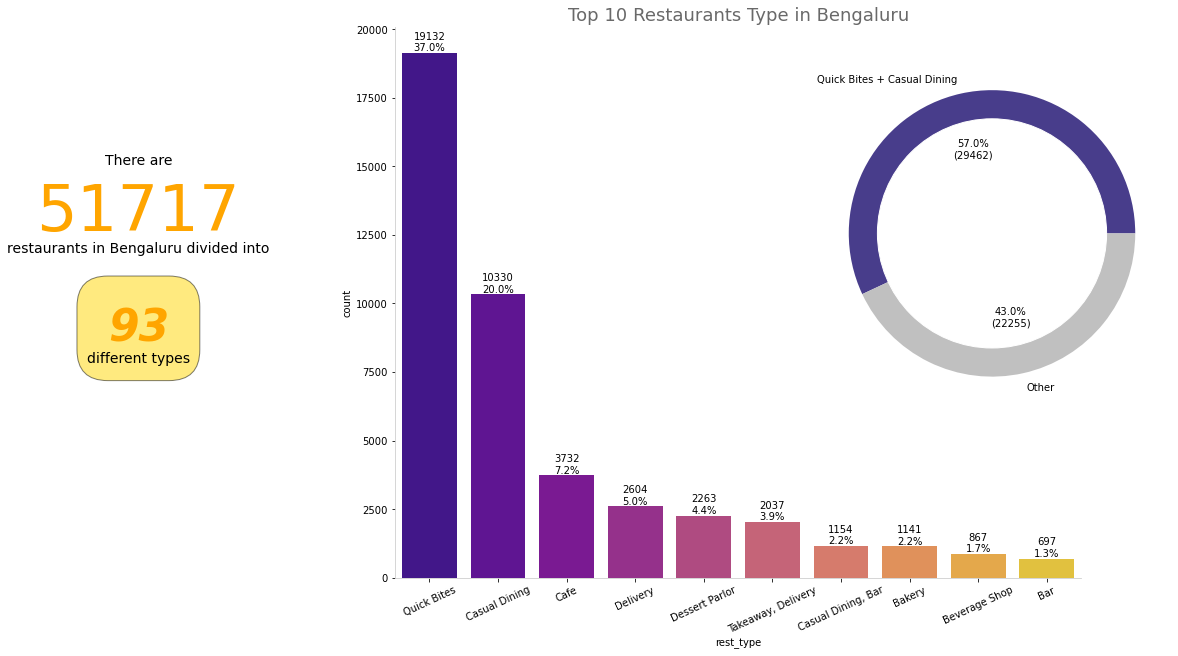

In [5]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(15, 9))

# Axis definition with GridSpec
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:3])

# Axis 1 - Big Number for total restaurants and total types in the data
total_restaurants = len(df_restaurants)
total_types = len(df_restaurants['rest_type'].value_counts())
ax1.text(0.00, 0.75, 'There are', fontsize=14, ha='center')
ax1.text(0.00, 0.63, f'{total_restaurants}', fontsize=64, color='orange', ha='center')
ax1.text(0, 0.59, 'restaurants in Bengaluru divided into', fontsize=14, ha='center')
ax1.text(0.00, 0.43, total_types, fontsize=44, ha='center', color='orange', style='italic', weight='bold',
         bbox=dict(facecolor='gold', alpha=0.5, pad=14, boxstyle='round, pad=.7'))
ax1.text(0, 0.39, 'different types', fontsize=14, ha='center')
ax1.axis('off')

# Axis 2 - Total number of restaurants per type (Top N)
top = 10
single_countplot(df_restaurants, ax2, x='rest_type', top=top)
ax2.set_title(f'Top {top} Restaurants Type in Bengaluru', color='dimgrey', size=18)
for tick in ax2.get_xticklabels():
    tick.set_rotation(25)
    
# Axis 3 - Representative of the top two restaurant type
df_restaurants['top_types'] = df_restaurants['rest_type'].apply(lambda x: 'Quick Bites + Casual Dining' if x in ('Quick Bites', 'Casual Dining') else 'Other')
ax3 = plt.axes([0, 0, 1, 1])
ip = InsetPosition(ax2, [0.57, 0.3, 0.6, 0.65])
ax3.set_axes_locator(ip)
donut_plot(df_restaurants, col='top_types', ax=ax3, colors=['darkslateblue', 'silver'], title='')

___
* _What are the most popular restaurants?_
___

For answearing the question above, let's group our data into some numerical variables that could probably show a good overview from restaurant's indicators like `total votes`, `mean approx cost`, `rate` and others. By the end, we will have in hands a new DataFrame with grouped information about all the restaurant's franchise in the dataset.

It's important to say that here we are grouping by `restaurant name` and, as long as there are restaurants with the same name in the dataset (same name but different locations, for example), we will also see how many unities each "franchise" have.

In [6]:
popular_franchises = df_restaurants.groupby(by='name', as_index=False).agg({'votes': 'sum',
                                                                            'url': 'count',
                                                                            'approx_cost': 'mean',
                                                                            'rate_num': 'mean'})
popular_franchises.columns = ['name', 'total_votes', 'total_unities', 'mean_approx_cost', 'mean_rate_num']
popular_franchises['votes_per_unity'] = popular_franchises['total_votes'] / popular_franchises['total_unities']
popular_franchises = popular_franchises.sort_values(by='total_unities', ascending=False)
popular_franchises = popular_franchises.loc[:, ['name', 'total_unities', 'total_votes', 'votes_per_unity',
                                                'mean_approx_cost', 'mean_rate_num']]

# Correcting a restaurant name
bug_name = 'SantÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Spa Cuisine'
popular_franchises['name'] = popular_franchises['name'].apply(lambda x: 'Santa Spa Cusisine' if x == bug_name else x)


popular_franchises.head(10)

name  total_unities  total_votes  votes_per_unity  \
1320    Cafe Coffee Day             96         3089        32.177083   
5549             Onesta             85       347520      4088.470588   
3788          Just Bake             73         2898        39.698630   
2446  Empire Restaurant             71       229808      3236.732394   
2577  Five Star Chicken             70         3134        44.771429   
3958       Kanti Sweets             68         7336       107.882353   
5790              Petoo             66         4242        64.272727   
5840         Polar Bear             65         8121       124.938462   
827      Baskin Robbins             64         2487        38.859375   
1655       Chef Baker's             62         5073        81.822581   

      mean_approx_cost  mean_rate_num  
1320        844.791667       3.256977  
5549        600.000000       4.410588  
3788        400.000000       3.405970  
2446        685.211268       4.030435  
2577        257.857143       3.425000  
3958        400.000000       3.898529  
5790        659.848485       3.833333  
5840        361.538462       4.031034  
827         251.562500       3.572581  
1655        516.071429       3.590909

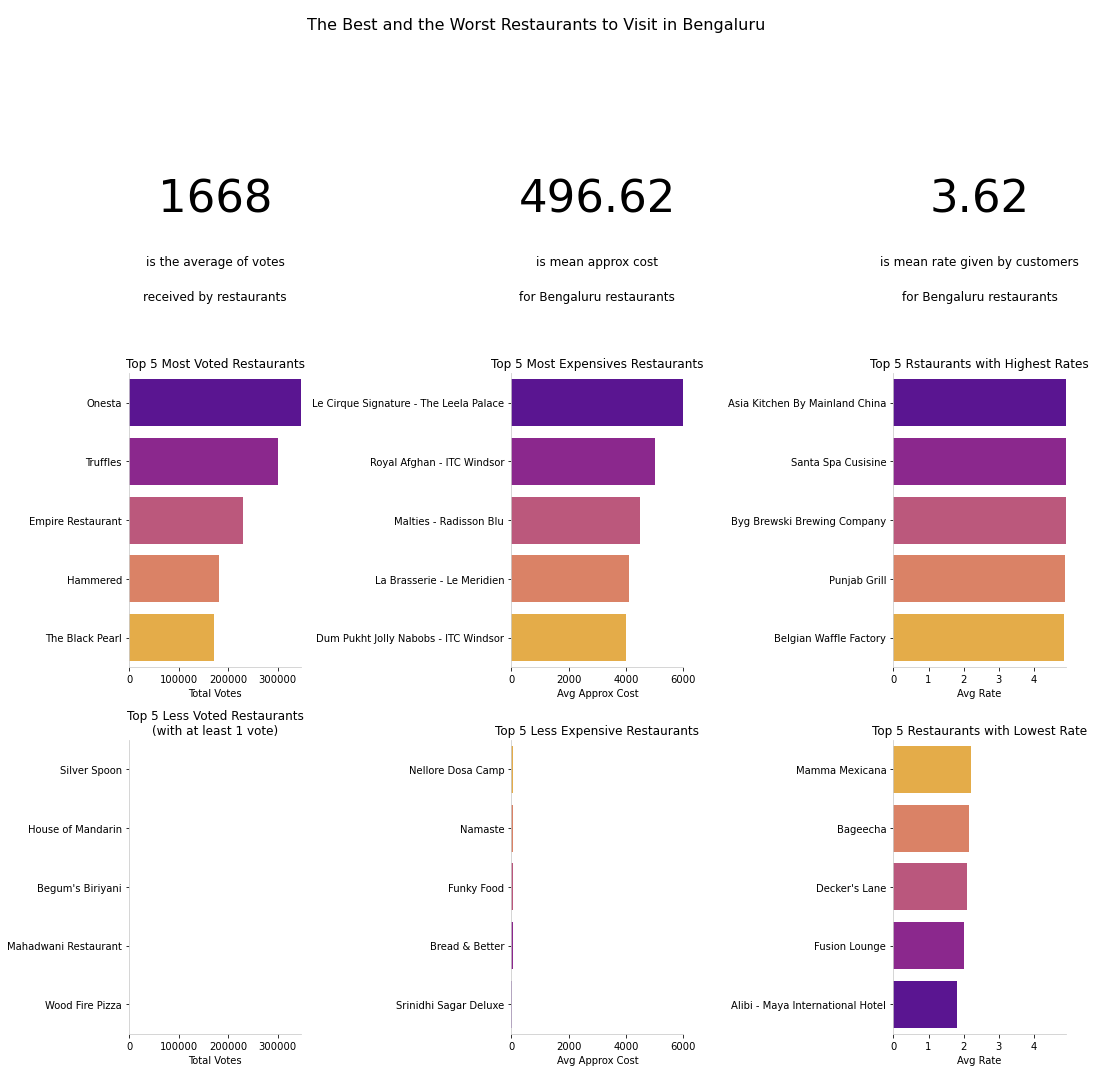

In [7]:
# Creating a figure por restaurants overview analysis
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plot Pack 01 - Most popular restaurants (votes)
sns.barplot(x='total_votes', y='name', data=popular_franchises.sort_values(by='total_votes', ascending=False).head(),
            ax=axs[1, 0], palette='plasma')
axs[1, 0].set_title('Top 5 Most Voted Restaurants', size=12)
sns.barplot(x='total_votes', y='name', 
            data=popular_franchises.sort_values(by='total_votes', ascending=False).query('total_votes > 0').tail(),
            ax=axs[2, 0], palette='plasma_r')
axs[2, 0].set_title('Top 5 Less Voted Restaurants\n(with at least 1 vote)', size=12)
for ax in axs[1, 0], axs[2, 0]:
    ax.set_xlabel('Total Votes')
    ax.set_xlim(0, popular_franchises['total_votes'].max())
    format_spines(ax, right_border=False)
    ax.set_ylabel('')

# Annotations
axs[0, 0].text(0.50, 0.30, int(popular_franchises.total_votes.mean()), fontsize=45, ha='center')
axs[0, 0].text(0.50, 0.12, 'is the average of votes', fontsize=12, ha='center')
axs[0, 0].text(0.50, 0.00, 'received by restaurants', fontsize=12, ha='center')
axs[0, 0].axis('off')

# Plot Pack 02 - Cost analysis
sns.barplot(x='mean_approx_cost', y='name', data=popular_franchises.sort_values(by='mean_approx_cost', ascending=False).head(),
            ax=axs[1, 1], palette='plasma')
axs[1, 1].set_title('Top 5 Most Expensives Restaurants', size=12)
sns.barplot(x='mean_approx_cost', y='name', 
            data=popular_franchises.sort_values(by='mean_approx_cost', ascending=False).query('mean_approx_cost > 0').tail(),
            ax=axs[2, 1], palette='plasma_r')
axs[2, 1].set_title('Top 5 Less Expensive Restaurants', size=12)
for ax in axs[1, 1], axs[2, 1]:
    ax.set_xlabel('Avg Approx Cost')
    ax.set_xlim(0, popular_franchises['mean_approx_cost'].max())
    format_spines(ax, right_border=False)
    ax.set_ylabel('')

# Annotations
axs[0, 1].text(0.50, 0.30, round(popular_franchises.mean_approx_cost.mean(), 2), fontsize=45, ha='center')
axs[0, 1].text(0.50, 0.12, 'is mean approx cost', fontsize=12, ha='center')
axs[0, 1].text(0.50, 0.00, 'for Bengaluru restaurants', fontsize=12, ha='center')
axs[0, 1].axis('off')

# Plot Pack 03 - Rate analysis
sns.barplot(x='mean_rate_num', y='name', data=popular_franchises.sort_values(by='mean_rate_num', ascending=False).head(),
            ax=axs[1, 2], palette='plasma')
axs[1, 2].set_title('Top 5 Rstaurants with Highest Rates', size=12)
sns.barplot(x='mean_rate_num', y='name', 
            data=popular_franchises.sort_values(by='mean_rate_num', ascending=False).query('mean_rate_num > 0').tail(),
            ax=axs[2, 2], palette='plasma_r')
axs[2, 2].set_title('Top 5 Restaurants with Lowest Rate', size=12)
for ax in axs[1, 2], axs[2, 2]:
    ax.set_xlabel('Avg Rate')
    ax.set_xlim(0, popular_franchises['mean_rate_num'].max())
    format_spines(ax, right_border=False)
    ax.set_ylabel('')

# Annotations
axs[0, 2].text(0.50, 0.30, round(popular_franchises.mean_rate_num.mean(), 2), fontsize=45, ha='center')
axs[0, 2].text(0.50, 0.12, 'is mean rate given by customers', fontsize=12, ha='center')
axs[0, 2].text(0.50, 0.00, 'for Bengaluru restaurants', fontsize=12, ha='center')
axs[0, 2].axis('off')

plt.tight_layout()
plt.suptitle('The Best and the Worst Restaurants to Visit in Bengaluru', size=16)
plt.show()

## Restaurants Services

Well, with the chart above we purpose a really good look at the Bengaluru scenario: we chose three numerical features (total votes, mean approx cost and rate). Now let's use other useful features of our dataset to understand how these numerical features can be changed along the services restaurants offers, like `book table` and `online order`.

___
* _How many restaurants offer Book Table service? And how about Online Order service?_
___

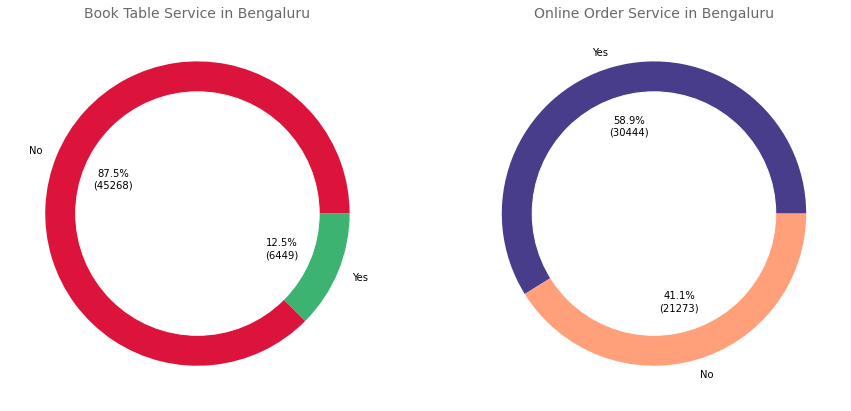

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
donut_plot(df_restaurants, col='book_table', colors=['crimson', 'mediumseagreen'], ax=axs[0], 
           title='Book Table Service in Bengaluru')
donut_plot(df_restaurants, col='online_order', colors=['darkslateblue', 'lightsalmon'], ax=axs[1], 
           title='Online Order Service in Bengaluru')

With the donuts above we can clearly see the proportions of Bengaluru restaurants who offers book table and online order service. In the first case, we can see that just 12.5% of restaurants have book table, while 87.5% don't offer this service.

By the other hand, we have almost 59% of restaurants who have online order service.

___
* _How the offering of Book Table service impact on Rate and Approx Cost?_
___

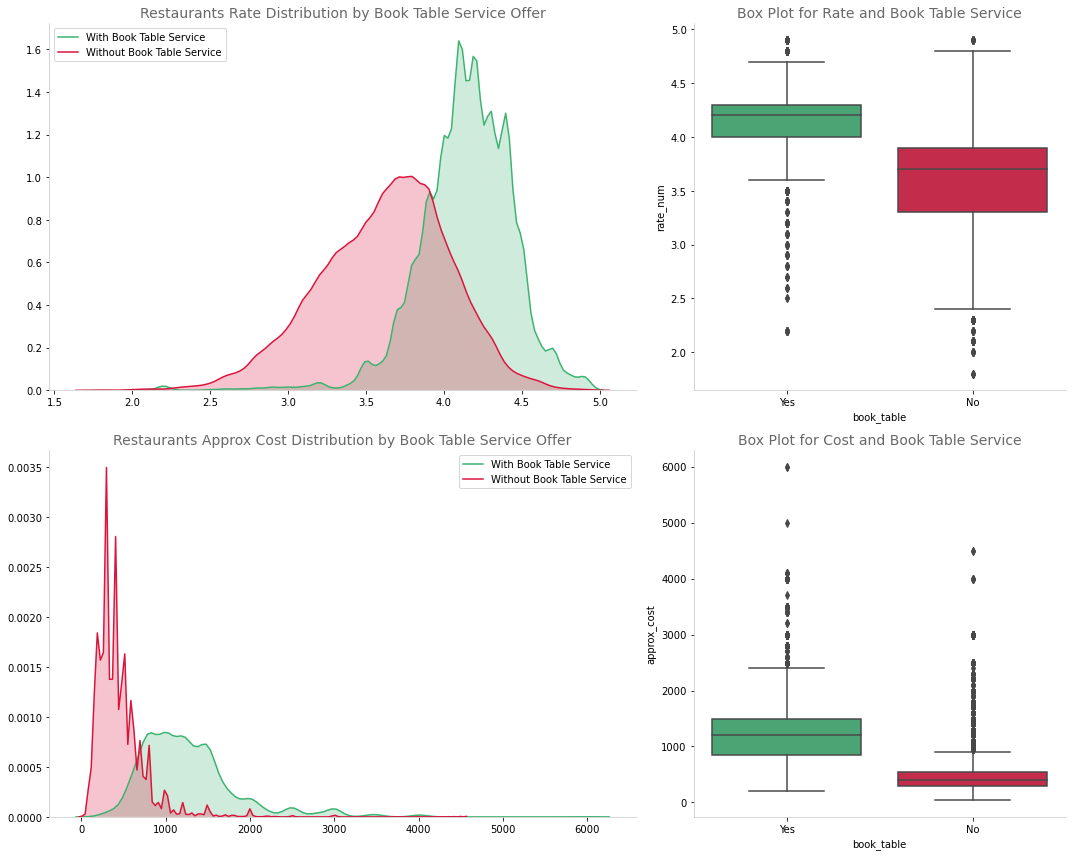

In [9]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition with GridSpec
gs = GridSpec(2, 5, figure=fig)
ax2 = fig.add_subplot(gs[0, :3])
ax3 = fig.add_subplot(gs[0, 3:])
ax4 = fig.add_subplot(gs[1, :3])
ax5 = fig.add_subplot(gs[1, 3:])

# First Line (01) - Rate
sns.kdeplot(df_restaurants.query('rate_num > 0 & book_table == "Yes"')['rate_num'], ax=ax2,
             color='mediumseagreen', shade=True, label='With Book Table Service')
sns.kdeplot(df_restaurants.query('rate_num > 0 & book_table == "No"')['rate_num'], ax=ax2,
             color='crimson', shade=True, label='Without Book Table Service')
ax2.set_title('Restaurants Rate Distribution by Book Table Service Offer', color='dimgrey', size=14)
sns.boxplot(x='book_table', y='rate_num', data=df_restaurants, palette=['mediumseagreen', 'crimson'], ax=ax3)
ax3.set_title('Box Plot for Rate and Book Table Service', color='dimgrey', size=14)

# First Line (01) - Cost
sns.kdeplot(df_restaurants.query('approx_cost > 0 & book_table == "Yes"')['approx_cost'], ax=ax4,
             color='mediumseagreen', shade=True, label='With Book Table Service')
sns.kdeplot(df_restaurants.query('approx_cost > 0 & book_table == "No"')['approx_cost'], ax=ax4,
             color='crimson', shade=True, label='Without Book Table Service')
ax4.set_title('Restaurants Approx Cost Distribution by Book Table Service Offer', color='dimgrey', size=14)
sns.boxplot(x='book_table', y='approx_cost', data=df_restaurants, palette=['mediumseagreen', 'crimson'], ax=ax5)
ax5.set_title('Box Plot for Cost and Book Table Service', color='dimgrey', size=14)


# Customizing plots
for ax in [ax2, ax3, ax4, ax5]:
    format_spines(ax, right_border=False)
    
plt.tight_layout()

The distplot and the boxplot above show us the importance given by the customers for book table service in restaurants: on the first line we notice that, in general, restaurants with book table service usually receive highest rate notes. Meanwhile, we can conclude by the second line that those same restaurants are usually more expensive.

___
* _How the offering of Online Order service impact on Rate and Approx Cost?_
___

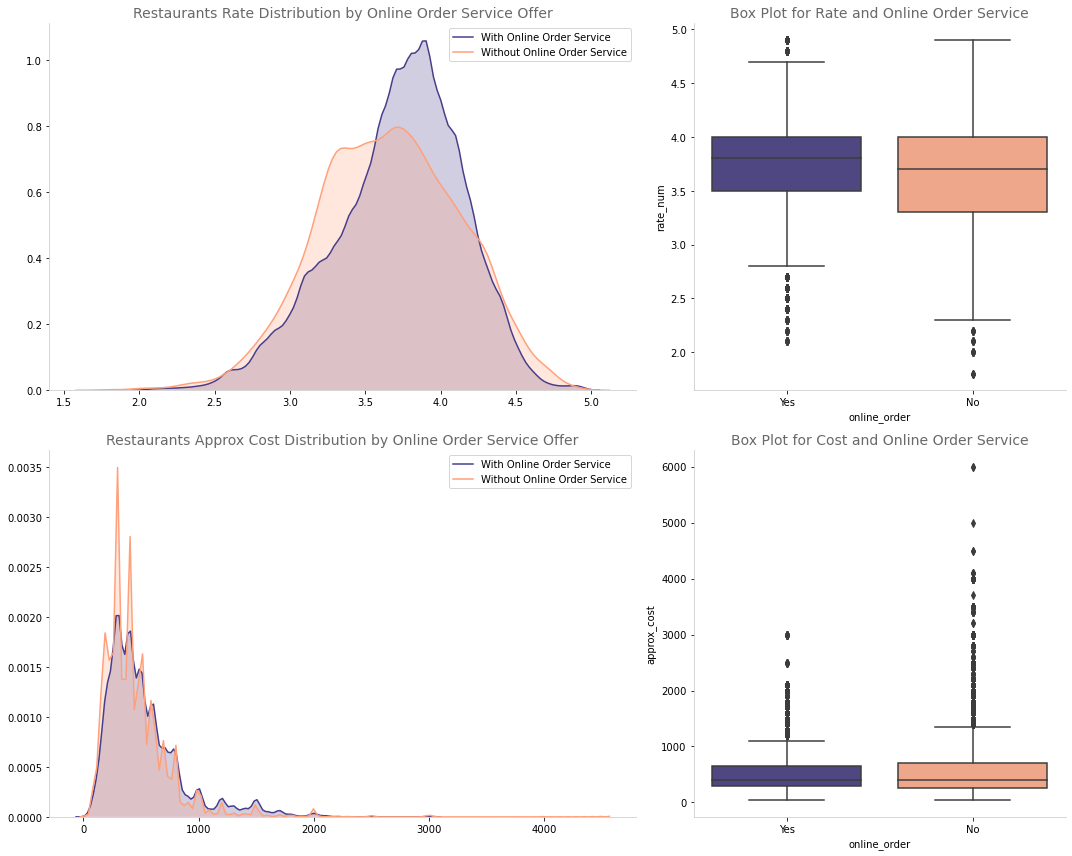

In [10]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition with GridSpec
gs = GridSpec(2, 5, figure=fig)
ax2 = fig.add_subplot(gs[0, :3])
ax3 = fig.add_subplot(gs[0, 3:])
ax4 = fig.add_subplot(gs[1, :3])
ax5 = fig.add_subplot(gs[1, 3:])

# First Line (01) - Rate
sns.kdeplot(df_restaurants.query('rate_num > 0 & online_order == "Yes"')['rate_num'], ax=ax2,
             color='darkslateblue', shade=True, label='With Online Order Service')
sns.kdeplot(df_restaurants.query('rate_num > 0 & online_order == "No"')['rate_num'], ax=ax2,
             color='lightsalmon', shade=True, label='Without Online Order Service')
ax2.set_title('Restaurants Rate Distribution by Online Order Service Offer', color='dimgrey', size=14)
sns.boxplot(x='online_order', y='rate_num', data=df_restaurants, palette=['darkslateblue', 'lightsalmon'], ax=ax3)
ax3.set_title('Box Plot for Rate and Online Order Service', color='dimgrey', size=14)

# First Line (01) - Cost
sns.kdeplot(df_restaurants.query('approx_cost > 0 & online_order == "Yes"')['approx_cost'], ax=ax4,
             color='darkslateblue', shade=True, label='With Online Order Service')
sns.kdeplot(df_restaurants.query('approx_cost > 0 & book_table == "No"')['approx_cost'], ax=ax4,
             color='lightsalmon', shade=True, label='Without Online Order Service')
ax4.set_title('Restaurants Approx Cost Distribution by Online Order Service Offer', color='dimgrey', size=14)
sns.boxplot(x='online_order', y='approx_cost', data=df_restaurants, palette=['darkslateblue', 'lightsalmon'], ax=ax5)
ax5.set_title('Box Plot for Cost and Online Order Service', color='dimgrey', size=14)


# Customizing plots
for ax in [ax2, ax3, ax4, ax5]:
    format_spines(ax, right_border=False)
    
plt.tight_layout()

Now if we look for online order service, it's fair to say that the customer don't give importance for this service as much they give for book table one. The rate distribution shows customers usually give highest rates for restaurants who offer online order service (even if the difference is little).

Looking at the cost comparison between restaurants who offer online order service, we can conclude that they are almost the same.

## Where Are the Good Ones?

Searching for useful insights for maybe predicting the success of a restaurant in Bengaluru, let's dive into locations to answear the question in the session title. By the way, where are the good restaurants?*

_*Good restaurants are relative and we will point that the the good ones have a high rate_

In [11]:
# Grouping data into location
good_ones = df_restaurants.groupby(by='location', as_index=False).agg({'votes': 'sum',
                                                                       'url': 'count',
                                                                       'approx_cost': 'mean',
                                                                       'rate_num': 'mean'})
good_ones.columns = ['location', 'total_votes', 'total_unities', 'mean_approx_cost', 'mean_rate_num']
good_ones['votes_per_unity'] = good_ones['total_votes'] / good_ones['total_unities']
good_ones = good_ones.sort_values(by='total_unities', ascending=False)
good_ones = good_ones.loc[:, ['location', 'total_unities', 'total_votes', 'votes_per_unity',
                                                'mean_approx_cost', 'mean_rate_num']]
good_ones.head(10)

location  total_unities  total_votes  votes_per_unity  \
0                     BTM           5124       619376       120.877440   
22                    HSR           2523       499720       198.065795   
45  Koramangala 5th Block           2504      2219506       886.384185   
29               JP Nagar           2235       586593       262.457718   
89             Whitefield           2144       466829       217.737407   
27            Indiranagar           2083      1196007       574.175228   
32              Jayanagar           1926       488080       253.416407   
56           Marathahalli           1846       445201       241.170639   
3       Bannerghatta Road           1630       219077       134.403067   
6               Bellandur           1286       206027       160.207621   

    mean_approx_cost  mean_rate_num  
0         396.480973       3.573740  
22        475.610048       3.672164  
45        663.663845       4.005821  
29        522.771300       3.675306  
89        598.152836       3.621618  
27        653.788027       3.828154  
32        476.407716       3.780280  
56        513.750683       3.541927  
3         443.679654       3.507449  
6         527.503888       3.525692

Looking forward to put those numbers into a beautiful chart, let's use a homemade function called `answear_plot()` created to simulate the same analysis made for the best and worst restaurants in Bengaluru. This function can be found at the `viz_utils.py` module.

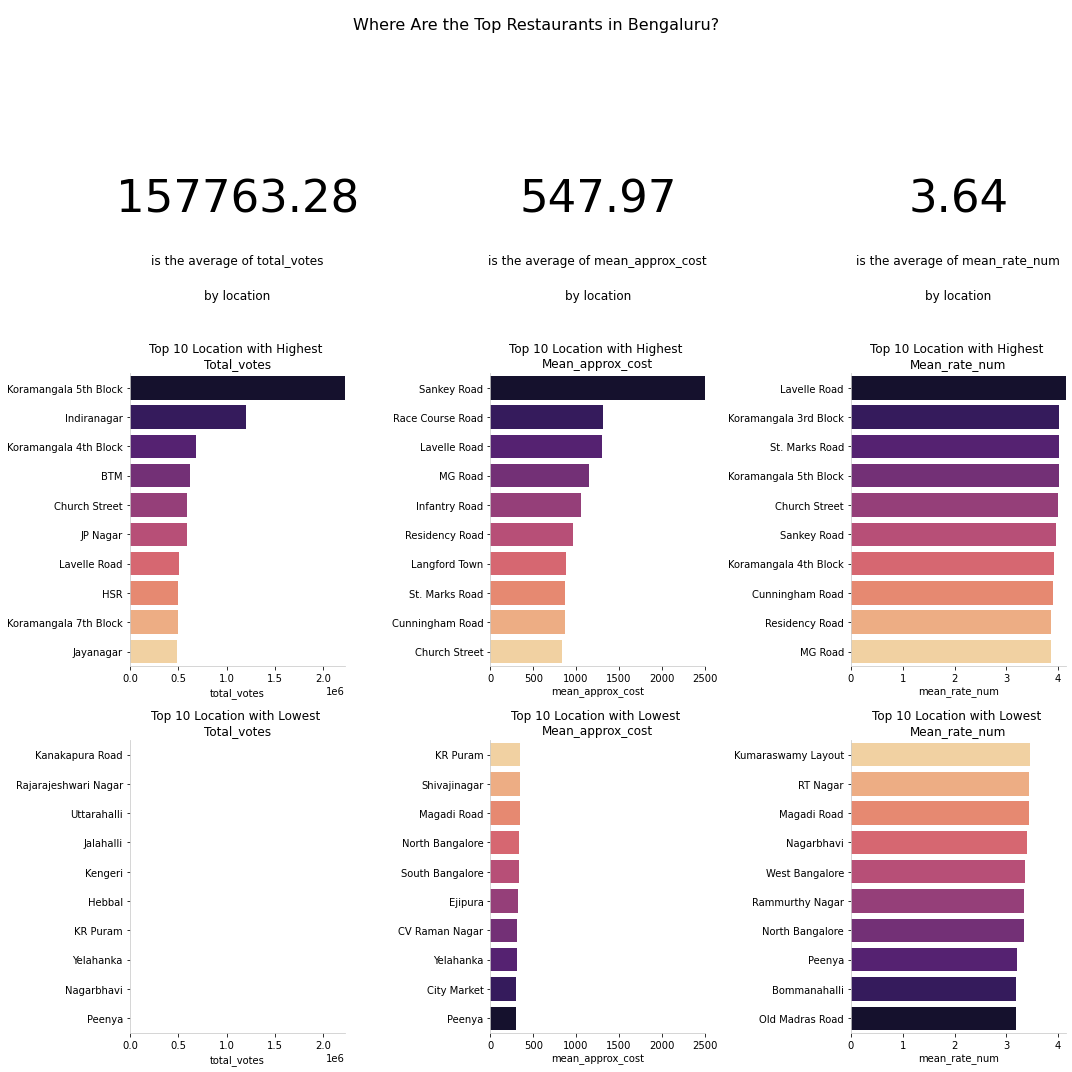

In [12]:
# Creating a figure por restaurants overview analysis
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
list_cols = ['total_votes', 'mean_approx_cost', 'mean_rate_num']

# PLotting best and worst by grouped data
answear_plot(grouped_data=good_ones, grouped_col='location', axs=axs, list_cols=list_cols, top=10, palette='magma')

# Finishing the chart
plt.suptitle('Where Are the Top Restaurants in Bengaluru?', size=16)
plt.tight_layout()
plt.show()

Now let's purpose a clearly view for cities with restaurants in Bengaluru and take a look at the average cost and rate of restaurants in each one. The idea is to see how these two variables are related and to present customers the insight of choosing the best city to visit (eating purposes) in Bengaluru.

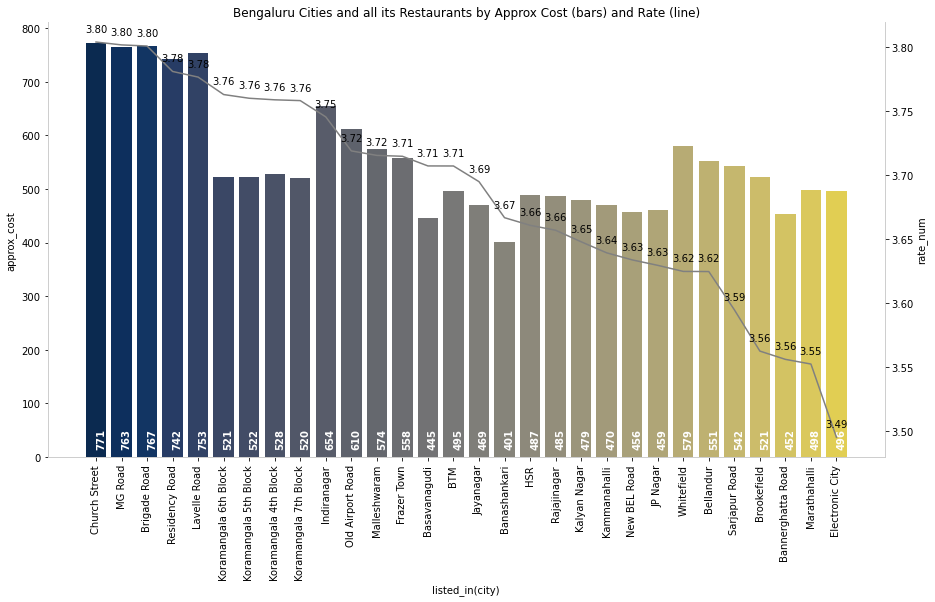

In [13]:
# Grouping data by city
city_group = df_restaurants.groupby(by='listed_in(city)', as_index=False).agg({'rate_num': 'mean',
                                                                               'approx_cost': 'mean'})
city_group.sort_values(by='rate_num', ascending=False, inplace=True)

# Ploting
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='listed_in(city)', y='approx_cost', data=city_group, palette='cividis', 
            order=city_group['listed_in(city)'])
ax2 = ax.twinx()
sns.lineplot(x='listed_in(city)', y='rate_num', data=city_group, color='gray', ax=ax2, sort=False)

# Labeling line chart (rate)
xs = np.arange(0, len(city_group), 1)
ys = city_group['rate_num']
for x,y in zip(xs, ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black')
    
# Labeling bar chart (cost)
for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{}'.format(int(y)), (x.mean(), 15), va='bottom', rotation='vertical', color='white', 
                fontweight='bold')

# Customizing chart
format_spines(ax)
format_spines(ax2)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Bengaluru Cities and all its Restaurants by Approx Cost (bars) and Rate (line)')
plt.show()

In the following steps, the real idea was to extract lat and long features from the address in the dataset, but there are huge differences between address formats that made it difficult. So, maybe the best we can do here is to extract geolocation features based in the restaurant city. 

Of course this is not the best approach in terms of location precision, but I think is the best we can do regarding on the problems in the dataset address column construction . Let's use the `Nominatim` API to help us doing this job. I'll let my user_agent open.

In [14]:
# Extracting lat and long from the restaurant city using an API service
geolocator = Nominatim(user_agent="Y_BzShFZceZ_rj_t-cI13w")

# Creating a auxiliar dataset with cities location (reducing the API calls and time consuming by consequence)
cities_aux = pd.DataFrame(df_restaurants['listed_in(city)'].value_counts())
cities_aux.reset_index(inplace=True)
cities_aux.columns = ['city', 'total_restaurants']

# Extracting cities lat and long features
cities_aux['lat'] = cities_aux['city'].apply(lambda x: geolocator.geocode(x)[1][0])
cities_aux['lng'] = cities_aux['city'].apply(lambda x: geolocator.geocode(x)[1][1])

# Adding more features do further analysis
city_group = df_restaurants.groupby(by='listed_in(city)', as_index=False).agg({'votes': 'sum',
                                                                               'approx_cost': 'mean',
                                                                               'rate_num': 'mean'})
city_group.columns = ['city', 'total_votes', 'avg_approx_cost', 'avg_rate_num']

# Creating an unique city data
cities_aux = cities_aux.merge(city_group, how='left', on='city')

# Merging the original data to the grouped cities lat and long
df_restaurants = df_restaurants.merge(cities_aux, how='left', left_on='listed_in(city)', right_on='city')
df_restaurants.drop(['city', 'total_restaurants'], axis=1, inplace=True)

# Results on cities grouped data
cities_aux

city  total_restaurants        lat         lng  \
0                     BTM               3279  12.911276   77.604565   
1   Koramangala 7th Block               2938  13.292399   77.751926   
2   Koramangala 5th Block               2836  13.292399   77.751926   
3   Koramangala 4th Block               2779  12.934334   77.630406   
4   Koramangala 6th Block               2623  13.292399   77.751926   
5               Jayanagar               2371  27.643927   83.052805   
6                JP Nagar               2096  12.265594   76.646540   
7             Indiranagar               1860  12.973291   77.640467   
8           Church Street               1827 -33.810589  151.004666   
9                 MG Road               1811  16.501881   80.642626   
10           Brigade Road               1769  40.287450  -76.964526   
11           Lavelle Road               1744  40.765284  -76.373824   
12                    HSR               1741  18.147500   41.538889   
13           Marathahalli               1659  12.955257   77.698416   
14         Residency Road               1620  36.101493   44.651494   
15             Whitefield               1620  44.373058  -71.611858   
16      Bannerghatta Road               1617  12.935802   77.601392   
17            Brookefield               1518  33.593506  -79.034563   
18       Old Airport Road               1425  42.810397  -81.834846   
19           Kammanahalli               1329  13.009346   77.637709   
20           Kalyan Nagar               1309  13.022142   77.640337   
21           Basavanagudi               1266  13.834591   75.733936   
22          Sarjapur Road               1261  12.924480   77.650274   
23        Electronic City               1229  -6.193820  106.892001   
24              Bellandur               1227  12.935772   77.666761   
25            Frazer Town               1185  12.996845   77.613017   
26           Malleshwaram               1096  13.002735   77.570325   
27            Rajajinagar               1079  12.988234   77.554883   
28           Banashankari                863  15.887678   75.704678   
29           New BEL Road                740  13.028825   77.571148   

    total_votes  avg_approx_cost  avg_rate_num  
0        985690       495.485145      3.707241  
1       1065901       520.497598      3.758410  
2       1040312       522.979026      3.760255  
3        992065       528.353924      3.759035  
4        978900       521.340524      3.763153  
5        563880       469.077053      3.694969  
6        395852       459.774904      3.629472  
7        781831       654.753655      3.745659  
8        687895       771.990104      3.804262  
9        722679       763.987696      3.802023  
10       648458       767.091115      3.801146  
11       583177       753.584873      3.776818  
12       376409       487.814302      3.660821  
13       365313       498.232078      3.552207  
14       588107       742.960723      3.781222  
15       336835       579.159925      3.624712  
16       244843       452.534077      3.555875  
17       270959       521.246702      3.562348  
18       584215       610.877698      3.719040  
19       174171       470.659591      3.639265  
20       176749       479.753657      3.647913  
21       281606       445.137549      3.707276  
22       314662       542.102729      3.594706  
23       109957       496.955102      3.494807  
24       356853       551.098361      3.624614  
25       283348       558.237288      3.714838  
26       262331       574.789762      3.715523  
27       198247       485.874649      3.656948  
28       151573       401.551564      3.666758  
29       149167       456.648575      3.633741

___
* _Geo Analysis: where are the restaurants located in Bengaluru?_
___

In [15]:
# Zipping locations for folium map
locations = list(zip(df_restaurants['lat'].values, df_restaurants['lng'].values))

# Creating a map using folium
map1 = folium.Map(
    location=[12.97, 77.63],
    zoom_start=11.5
)

# Plugin: FastMarkerCluster
FastMarkerCluster(data=locations).add_to(map1)

map1

___
* _Heat Map: where are the restaurants with high average rate?_
___

In [16]:
map1 = folium.Map(
    location=[12.97, 77.63],
    zoom_start=11.0,
    tiles='cartodbdark_matter'
)

HeatMap(
    data=cities_aux.loc[:, ['lat', 'lng', 'avg_rate_num']],
    radius=35
).add_to(map1)

map1

Well, as I said before, this map vision session have low precision because we get the latitude and longitude information using the cities instead of the address. Again, we did this way because it was difficult to parse all the addresses in this dataset and also because of API's free tier time consuming and total requests limitations.

Even so, it's fair to say that some good information was delivered on the maps above. You can improve it by bringing precision geolocation information to this zomato dataset.

## Zomato Customers Preferences

Let's take a closer look into the type of restaurants in this zomato dataset. The idea is to see if there is some preference in zomato orders.

___
* _How the rate and approx cost are distributed among restaurant types?_
___

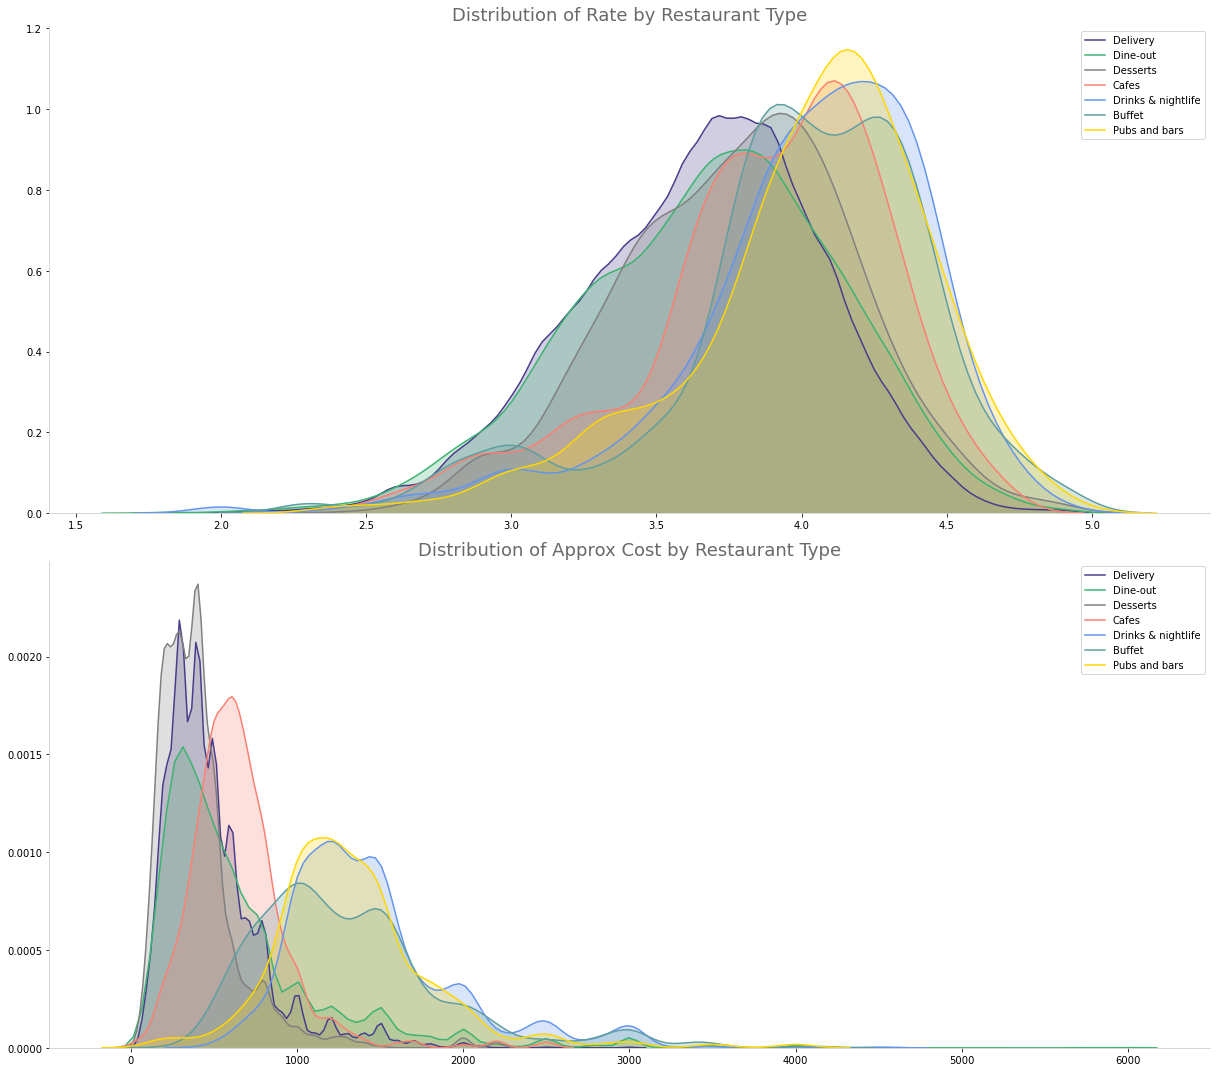

In [17]:
rest_types = list(df_restaurants['listed_in(type)'].value_counts().index)
colors = ['darkslateblue', 'mediumseagreen', 'gray', 'salmon', 'cornflowerblue', 'cadetblue', 'gold']

fig, axs = plt.subplots(2, 1, figsize=(17, 15))
for r_type in rest_types:
    idx = rest_types.index(r_type)
    kde_data = df_restaurants[(df_restaurants['rate_num'] > 0) & (df_restaurants['listed_in(type)'] == r_type)]
    sns.kdeplot(kde_data['rate_num'], ax=axs[0], color=colors[idx], shade=True, label=r_type)
    sns.kdeplot(kde_data['approx_cost'], ax=axs[1], color=colors[idx], shade=True, label=r_type)

# Customizing charts
axs[0].set_title('Distribution of Rate by Restaurant Type', color='dimgrey', size=18)
axs[1].set_title('Distribution of Approx Cost by Restaurant Type', color='dimgrey', size=18)
for ax in axs:
    format_spines(ax, right_border=False)
plt.tight_layout()

## Food Options

In this session we will discuss the customer's food preferences. The goal is to go trough the text presented in the columns like `cuisines` and `dish_liked` to extract valuable information about options available in Bengaluru set of restaurants.

___
* _What we can conclude about main options available on Bengaluru restaurants?_
___

For answearing this question, let's do a text mining on `cuisine` column fo extract single options for each restaurant. After that, we will plot a WordCloud to see trends on food options.

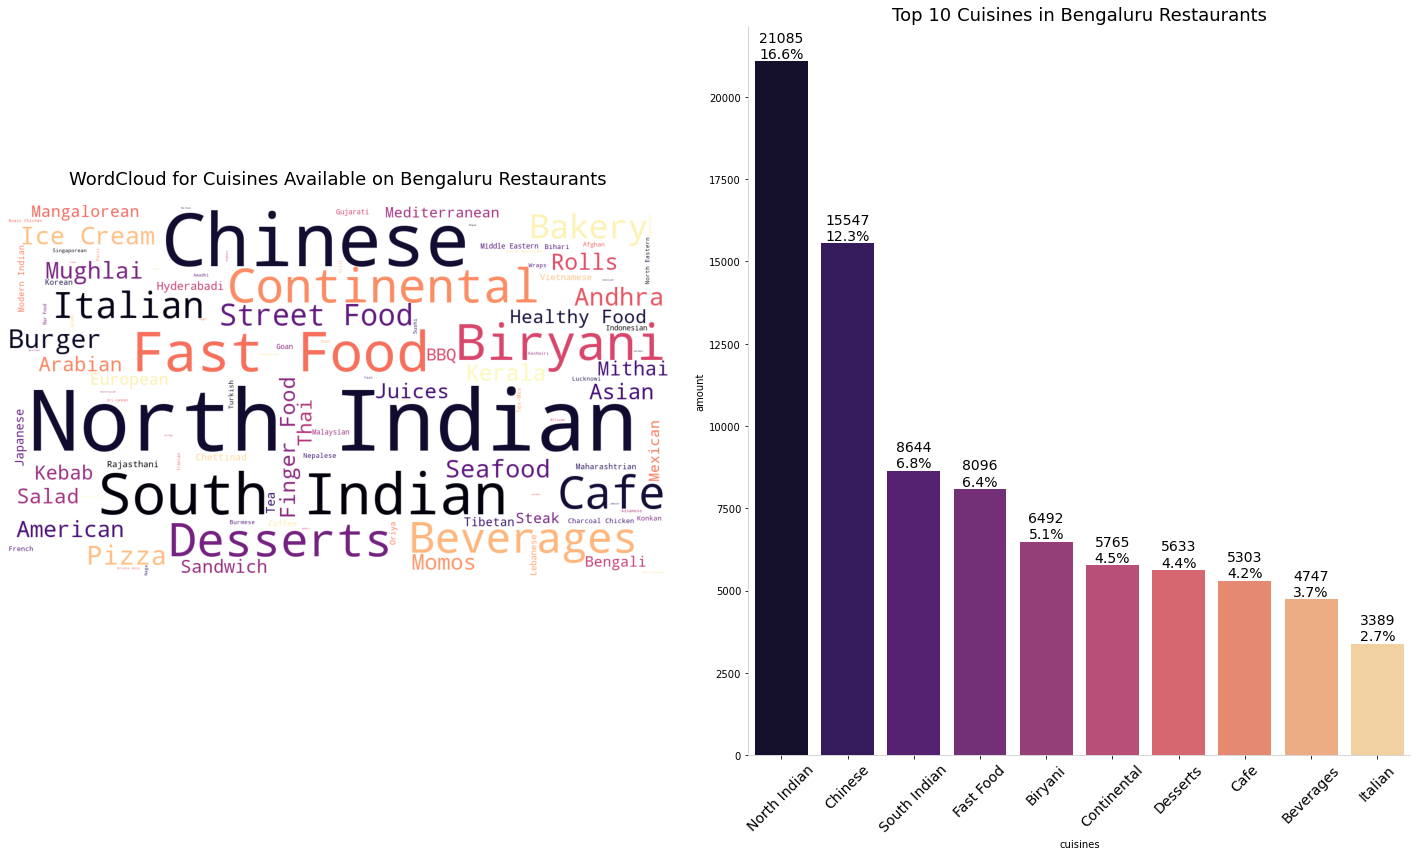

In [18]:
# Creating a list with all options available
cuisines = list(df_restaurants['cuisines'].astype(str).values)
cuisines_word_list = []
for lista in [c.split(',') for c in cuisines]:
    for word in lista:
        cuisines_word_list.append(word.strip())
        
# Creating a Counter for unique options and generating the wordcloud
cuisines_wc_dict = Counter(cuisines_word_list)

wordcloud = WordCloud(width=1280, height=720, collocations=False, random_state=42, 
                      colormap='magma', background_color='white').generate_from_frequencies(cuisines_wc_dict)

# Visualizing the WC created and the total for each cuisine
fig, axs = plt.subplots(1, 2, figsize=(20, 12))
ax1 = axs[0]
ax2 = axs[1]
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('WordCloud for Cuisines Available on Bengaluru Restaurants', size=18, pad=20)

# Total for each cuisine
df_cuisines = pd.DataFrame()
df_cuisines['cuisines'] = cuisines_wc_dict.keys()
df_cuisines['amount'] = cuisines_wc_dict.values()
df_cuisines.sort_values(by='amount', ascending=False, inplace=True)
sns.barplot(x='cuisines', y='amount', data=df_cuisines.head(10), palette='magma', ax=ax2)
format_spines(ax2, right_border=False)
ax2.set_title('Top 10 Cuisines in Bengaluru Restaurants', size=18)

# Customizing chart
ncount = df_cuisines['amount'].sum()
x_ticks = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels(x_ticks, rotation=45, fontsize=14)
for p in ax2.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax2.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), fontsize=14, ha='center', va='bottom')

plt.tight_layout()
plt.show()

We can see a lot of North Indian, Chinese, South Indian, Fast Food, Desserts and other patterns related to options available in Bengaluru area. Good! Let's apply the same approach on `dish_liked` column to see if there are more trends.

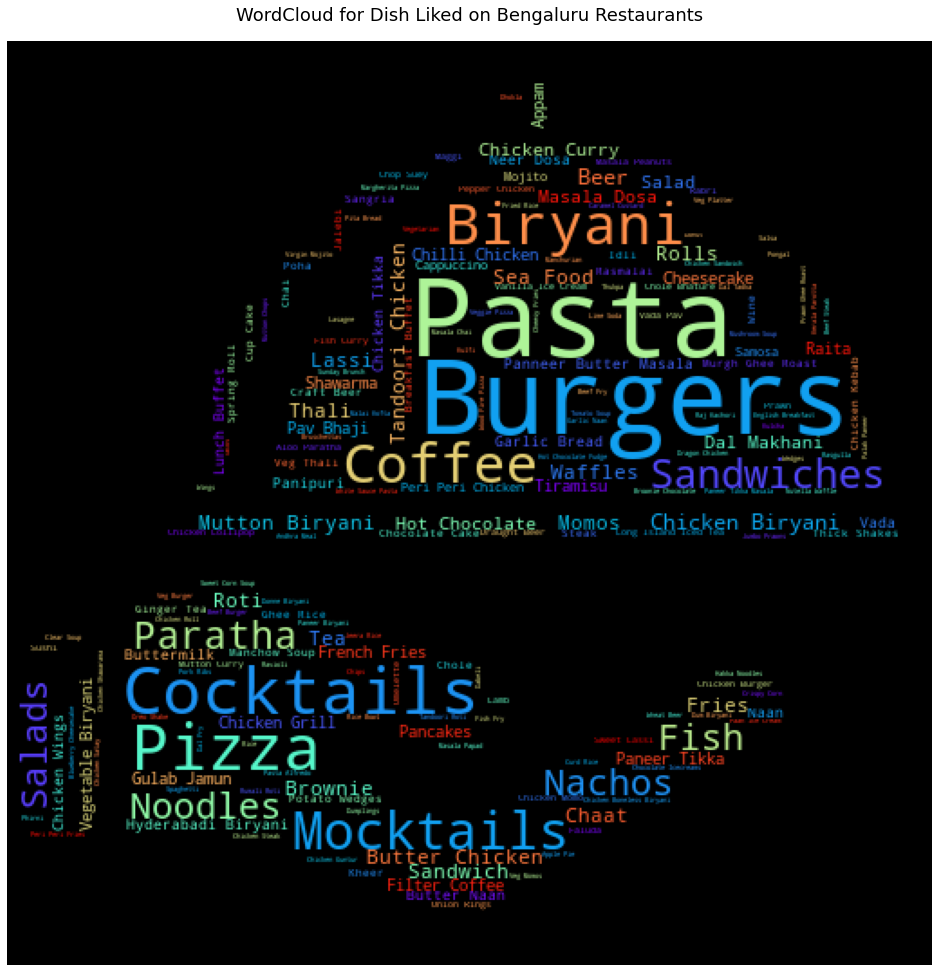

In [19]:
# Creating a list with all options available
dishes = list(df_restaurants['dish_liked'].dropna().astype(str).values)
dishes_word_list = []
for lista in [c.split(',') for c in dishes]:
    for word in lista:
        dishes_word_list.append(word.strip())
        
# Creating a Counter for unique options and generating the wordcloud
dished_wc_dict = Counter(dishes_word_list)

# Reading and preparing a mask for serving as wordcloud background
food_mask = np.array(Image.open("img/delivery_icon.png"))
food_mask = food_mask[:, :, -1]
transf_mask = np.ndarray((food_mask.shape[0], food_mask.shape[1]), np.int32)
for i in range(len(food_mask)):
    transf_mask[i] = [255 if px == 0 else 0 for px in food_mask[i]]

# Generating the wordcloud    
wordcloud = WordCloud(width=1000, height=500, collocations=False, random_state=42, colormap='rainbow', 
                      background_color='black', mask=transf_mask).generate_from_frequencies(dished_wc_dict)

# Visualizing the WC created
plt.figure(figsize=(20, 17))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud for Dish Liked on Bengaluru Restaurants', size=18, pad=20)
plt.show()

Wow! There are a huge amount of Pasta, Burgers and Cocktails. We can also see Pizza, Biryani, Coffe, Sanwiches and others.

# Predicting the Success of a Restaurant

Well, finally we arrived at our main task on this notebook: predict the success of a restaurant in Bengaluru using the data provided and extracting some additional features. At this point probably you're asking: but how we will do it? That's what a thought for this task:

    1. Use the restaurant rate to classify our data in two classes: good and bad (thresholds to be defined)
    2. Create a target variable using a pre-defined rate threshold
    3. Extract features from the data
    4. Create a classification model using a supervisioned approach
    5. Predict the "probability for being a good restaurant" for the ones marked as NEW or without rate
    
First of all, let's split the data we will use for train/validation and the data we want to do a real prediction.

## Target Definition

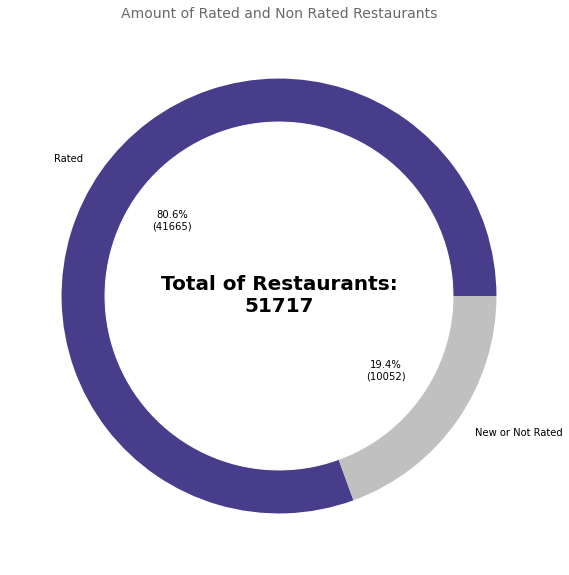

In [20]:
# Splitting restaurants
df_restaurants['rated'] = df_restaurants['rate_num'].apply(lambda x: 1 if x >= 0 else 0)
new_restaurants = df_restaurants.query('rated == 0')
train_val_restaurants = df_restaurants.query('rated == 1')

# PLotting a donut chart for seeing the distribution
fig, ax = plt.subplots(figsize=(10, 10))
donut_plot(df_restaurants, col='rated', ax=ax, label_names=['Rated', 'New or Not Rated'], 
           colors=['darkslateblue', 'silver'], title='Amount of Rated and Non Rated Restaurants',
           text=f'Total of Restaurants:\n{len(df_restaurants)}')

By now we've already splitted our original data into `new_restaurants` and `train_val_restaurants` pandas DataFrames. Let's keep the first one aside for now and let's work only with the training and validation set. The next step is to create our target variable to be used in this classification task.

The main point here is to define a fair threshold for splitting the restaurants into `good` and `bad` ones. It would be a really experimental decision and we must keep in mind that this approach is not the best one. Probably it would let margin for classification errors. Even so, let's try!

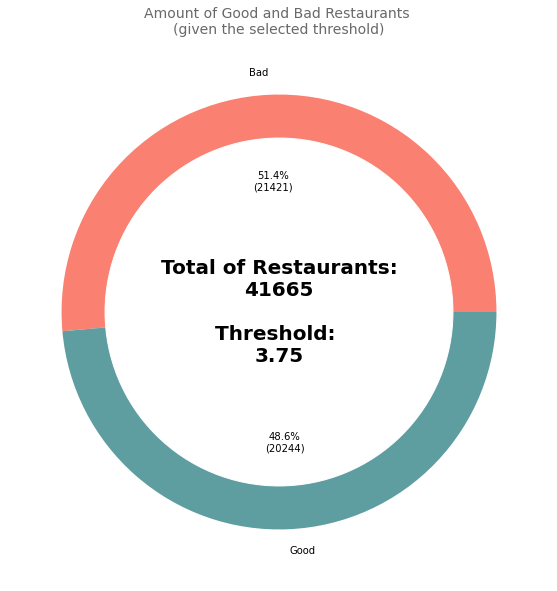

In [21]:
# Defining a custom threshold for splitting restaurants into good and bad
threshold = 3.75
train_val_restaurants['target'] = train_val_restaurants['rate_num'].apply(lambda x: 1 if x >= threshold else 0)

# Donut chart
fig, ax = plt.subplots(figsize=(10, 10))
label_names = ['Bad' if target == 0 else 'Good' for target in train_val_restaurants['target'].value_counts().index]
color_list = ['salmon' if label == 'Bad' else 'cadetblue' for label in label_names]
donut_plot(train_val_restaurants, col='target', ax=ax, label_names=label_names, 
           colors=color_list, title='Amount of Good and Bad Restaurants \n(given the selected threshold)',
           text=f'Total of Restaurants:\n{len(train_val_restaurants)}\n\nThreshold: \n{threshold}')

Ok, for our first trial it's fair. The meaning of all this is that we marked as `good` restaurants with a rate greather or ewual **3.75**. Correct or not, let's continue to see what we can get from this.

The next step is to prepare some features for training our classification model.

## Feature Extraction

After defining the target and splitting the data into train+val and test sets, let's define the features to be used on training. Here we will take a look at the raw data to select valuable features and apply some steps to create another ones.

The initial set of selected features inclue:
    - online_order;
    - book_table;
    - location;
    - rest_type;
    - cuisines;
    - listed_in(type);
    - listed_in(city);
    - approx_cost

In [22]:
# Selecting initial features
initial_features = ['online_order', 'book_table', 'location', 'rest_type', 'cuisines', 
                    'listed_in(type)', 'listed_in(city)', 'approx_cost', 'target']
train_val_restaurants = train_val_restaurants.loc[:, initial_features]

# Extracting new features
train_val_restaurants['multiple_types'] = train_val_restaurants['rest_type'].astype(str).apply(lambda x: len(x.split(',')))
train_val_restaurants['total_cuisines'] = train_val_restaurants['cuisines'].astype(str).apply(lambda x: len(x.split(',')))

# Dropping another ones
train_val_restaurants.drop('cuisines', axis=1, inplace=True)
train_val_restaurants.head()

online_order book_table      location            rest_type listed_in(type)  \
0          Yes        Yes  Banashankari        Casual Dining          Buffet   
1          Yes         No  Banashankari        Casual Dining          Buffet   
2          Yes         No  Banashankari  Cafe, Casual Dining          Buffet   
3           No         No  Banashankari          Quick Bites          Buffet   
4           No         No  Basavanagudi        Casual Dining          Buffet   

  listed_in(city)  approx_cost  target  multiple_types  total_cuisines  
0    Banashankari        800.0       1               1               3  
1    Banashankari        800.0       1               1               3  
2    Banashankari        800.0       1               2               3  
3    Banashankari        300.0       0               1               2  
4    Banashankari        600.0       1               1               2

Some considerations:

* We won't use the `votes` feature as long as this is a information we only know after launching a restaurant. As we want to be predictive, the idea is to return the probability of success of a restaurant before launching it.
* We created the `multiple_types`, `total_dishes` and `total_cuisines` features in a way of counting the food services offered by the restaurant. This is information can be gotten before the launching of the establishment.

For the last act on this topic, let's split the data into training and validation sets once and for all.

In [23]:
# Splitting the data
X = train_val_restaurants.drop('target', axis=1)
y = train_val_restaurants['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

## Encoding

Looking at the data we prepared for training our classification model, it's important to point the need to apply some encoding technique on categorical features. Here we can define the "global reach" of your restaurant success predictor: using features like `location` and `listed_in(city)` for training will restrict the use of our model to Bengaluru area only. Let's keep those ones for awhile pointing that, at least on this first moment, our classifcation model could only be used to predict success of restaurants in Bengaluru.

In [24]:
# Example of encoding on online_order attrib
feature_example = 'online_order'

# Applying encoding for online_order feature
X_example = pd.DataFrame(X_train[feature_example])
X_encoding_example = pd.get_dummies(X_example, prefix=feature_example, dummy_na=True)
X_encoding_example = X_example.merge(X_encoding_example, left_index=True, right_index=True)
X_encoding_example.head()

online_order  online_order_No  online_order_Yes  online_order_nan
39673          Yes                0                 1                 0
19282          Yes                0                 1                 0
29686          Yes                0                 1                 0
48913          Yes                0                 1                 0
43404           No                1                 0                 0

On the pipeline, we will use the homemade `DummiesEncoding` class (available at the utility script `custom_transformers.py`) for applying the same proccess on a list of categorical features selected and transformed for training.

## Pipeline

It's probably time to build a complete Pipeline for receiving the raw data with restaurants information and apply all the steps we select for make the data ready for training or prediction. In a first approach, the pipeline will consider:

* Preparing the cost and rate attribute from raw data;
* Selecting initial features to be part of data prep;
* Creating new features based on original data;
* Creating a target for using on training;
* Splitting restaurants based on rated and non-rated ones;
* Encoding the data for categorical features;
* Filling the null data with meadian for numerical features;

In [25]:
# Class for applying initial prep on key columns
class PrepareCostAndRate(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Extracting the approx cost feature
        X['approx_cost'] = X['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', '.'))
        X['approx_cost'] = X['approx_cost'].astype(float)
        
        # Extracting the rate feature
        X['rate_num'] = X['rate'].astype(str).apply(lambda x: x.split('/')[0])
        while True:
            try:
                X['rate_num'] = X['rate_num'].astype(float)
                break
            except ValueError as e1:
                noise_entry = str(e1).split(":")[-1].strip().replace("'", "")
                #print(f'Threating noisy entrance on rate feature: {noise_entry}')
                X['rate_num'] = X['rate_num'].apply(lambda x: x.replace(noise_entry, str(np.nan)))              
        
        return X

# Class for selection the initial features
class InitialFeatureSelection(BaseEstimator, TransformerMixin):
    
    def __init__(self, initial_features=['online_order', 'book_table', 'location', 'rest_type', 'cuisines', 
                                         'listed_in(type)', 'listed_in(city)', 'approx_cost', 'rate_num']):
        self.initial_features = initial_features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.initial_features]
                
# Class for creating some features
class RestaurantAdditionalFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self, multiples_types=True, total_cuisines=True, top_locations=10, top_cities=10, top_types=10):
        self.multiples_types = multiples_types
        self.total_cuisines = total_cuisines
        self.top_locations = top_locations
        self.top_cities = top_cities
        self.top_types = top_types
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        # Adding features based on counting of restaurant types and cuisines
        if self.multiples_types:
            X['multiple_types'] = X['rest_type'].astype(str).apply(lambda x: len(x.split(',')))
        if self.total_cuisines:
            X['total_cuisines'] = X['cuisines'].astype(str).apply(lambda x: len(x.split(',')))
            X.drop('cuisines', axis=1, inplace=True)
            
        # Creating for features for reducing granularity on location
        main_locations = list(X['location'].value_counts().index)[:self.top_locations]
        X['location_feature'] = X['location'].apply(lambda x: x if x in main_locations else 'Other')
        X.drop('location', axis=1, inplace=True)
        
        # Creating for features for reducing granularity on city
        main_cities = (X['listed_in(city)'].value_counts().index)[:self.top_cities]
        X['city_feature'] = X['listed_in(city)'].apply(lambda x: x if x in main_cities else 'Other')
        X.drop('listed_in(city)', axis=1, inplace=True)
        
        # Creating for features for reducing granularity on restaurant type
        main_rest_type = (X['rest_type'].value_counts().index)[:self.top_types]
        X['type_feature'] = X['rest_type'].apply(lambda x: x if x in main_rest_type else 'Other')
        X.drop('rest_type', axis=1, inplace=True)
        
        return X
            
# Class for creating a target based on a threshold (training only)
class CreateTarget(BaseEstimator, TransformerMixin):
    
    def __init__(self, threshold=3.75):
        self.threshold = threshold
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['target'] = X['rate_num'].apply(lambda x: 1 if x >= self.threshold else 0)
        
        return X
    
# Class for splitting the data into new (not rated) and old (rated) restaurants
class SplitRestaurants(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Splits the restaurants based on rate column (rated and non rated)
        rated = X[~X['rate_num'].isnull()]
        non_rated = X[X['rate_num'].isnull()]
        
        # Dropping the rate column
        rated.drop('rate_num', axis=1, inplace=True)
        non_rated.drop('rate_num', axis=1, inplace=True)
        
        return rated, non_rated

In [26]:
# Reading raw data
data_path = r'D:\Users\thiagoPanini\Documents\Datasets\kaggle_ZomatoRestaurants\zomato.csv'
raw_data = pd.read_csv(data_path)

# Defining a commoon pipeline to be applied after reading the raw data
common_pipeline = Pipeline([
    ('initial_preparator', PrepareCostAndRate()),
    ('selector', InitialFeatureSelection()),
    ('feature_adder', RestaurantAdditionalFeatures()),
    ('target_creator', CreateTarget()),
    ('new_splitter', SplitRestaurants())
])

# Applying the initial pipeline
train_restaurants, new_restaurants = common_pipeline.fit_transform(raw_data)
print(f'Total restaurants to be used on training: {len(train_restaurants)}')
print(f'Total restaurants to be used on prediction: {len(new_restaurants)}')

Total restaurants to be used on training: 41665
Total restaurants to be used on prediction: 10052


Let's take a look at our `train_restaurants` data:

In [27]:
train_restaurants.head()

online_order book_table listed_in(type)  approx_cost  multiple_types  \
0          Yes        Yes          Buffet        800.0               1   
1          Yes         No          Buffet        800.0               1   
2          Yes         No          Buffet        800.0               2   
3           No         No          Buffet        300.0               1   
4           No         No          Buffet        600.0               1   

   total_cuisines location_feature city_feature   type_feature  target  
0               3            Other        Other  Casual Dining       1  
1               3            Other        Other  Casual Dining       1  
2               3            Other        Other          Other       1  
3               2            Other        Other    Quick Bites       0  
4               2            Other        Other  Casual Dining       1

Let's define and apply a categorical and a numerical pipeline for preparing the data:

In [28]:
# Splitting into training and testing data
X = train_restaurants.drop('target', axis=1)
y = train_restaurants['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

# Splitting into cat and num data
cat_features = [col for col, dtype in X_train.dtypes.items() if dtype == 'object']
num_features = [col for col, dtype in X_train.dtypes.items() if dtype != 'object']

# Building a numerical processing pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Building a categorical processing pipeline
cat_pipeline = Pipeline([
    ('encoder', DummiesEncoding(dummy_na=True))
])

# Building a complete Pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Applying the full pipeline into the data
X_train_prep = full_pipeline.fit_transform(X_train)
X_test_prep = full_pipeline.fit_transform(X_test)
print(f'Shape of X_train_prep: {X_train_prep.shape}')
print(f'Shape of X_test_prep: {X_test_prep.shape}')

# returning categorical features after encoding and creating a new set of features after the pipeline
encoded_features = full_pipeline.named_transformers_['cat']['encoder'].features_after_encoding
model_features = num_features + encoded_features
print(f'\nSanity check! Number of features after the pipeline (must be the same as shape[1]): {len(model_features)}')

Shape of X_train_prep: (33332, 53)
Shape of X_test_prep: (8333, 53)

Sanity check! Number of features after the pipeline (must be the same as shape[1]): 53


Perfect! We are now ready to train classification models and select the best one for our task!

## Training a Model

Finally, we come to the main point of our project: training a classification model to predict the probability of success (high rate) of a given restaurant. We have already went trough about 80% of work done on prep and transformations. So, for making this training step easier, let's use a homemade utility script called `ml_utils.py`. It contains a class called `BinaryClassifierAnalysis` with useful methods for training and evaluating selected classifiers.

For this task, let's train a `LogisticRegression`, `DecisionTrees`, `RandomForest` and `LightGBM` classifiers, each one using `RandomizedGridSearchCV` with 5 k-folds and hiperparameters pre-defined.

In [29]:
# Logistic Regression hyperparameters
logreg_param_grid = {
    'C': np.linspace(0.1, 10, 20),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'solver': ['liblinear']
}

# Decision Trees hyperparameters
tree_param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 5, 10, 20],
    'max_features': np.arange(1, X_train.shape[1]),
    'class_weight': ['balanced', None],
    'random_state': [42]
}

# Random Forest hyperparameters
forest_param_grid = {
    'bootstrap': [True, False],
    'max_depth': [3, 5, 10, 20, 50],
    'n_estimators': [50, 100, 200, 500],
    'random_state': [42],
    'max_features': ['auto', 'sqrt'],
    'class_weight': ['balanced', None]
}

# LightGBM hyperparameters
lgbm_param_grid = {
    'num_leaves': list(range(8, 92, 4)),
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [3, 4, 5, 6, 8, 12, 16],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'bagging_freq': [3, 4, 5, 6, 7],
    'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10),
}

lgbm_fixed_params = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

In [30]:
# Setting up classifiers
set_classifiers = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': logreg_param_grid
    },
    'DecisionTrees': {
        'model': DecisionTreeClassifier(),
        'params': tree_param_grid
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': forest_param_grid
    },
    'LightGBM': {
        'model': lgb.LGBMClassifier(**lgbm_fixed_params),
        'params': lgbm_param_grid
    }
}

___
* _Training and evaluating classifiers_
___

In [31]:
# Creating an instance for the homemade class BinaryClassifiersAnalysis
clf_tool = BinaryClassifiersAnalysis()
clf_tool.fit(set_classifiers, X_train_prep, y_train, random_search=True, cv=5, verbose=5)

Training model LogisticRegression

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.2s finished


Training model DecisionTrees

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished


Training model RandomForest

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished


Training model LightGBM

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.4s finished


In [32]:
# Evaluating metrics
df_performances = clf_tool.evaluate_performance(X_train_prep, y_train, X_test_prep, y_test, cv=5)
df_performances.reset_index(drop=True).style.background_gradient(cmap='Blues')

Evaluating model LogisticRegression

Evaluating model DecisionTrees

Evaluating model RandomForest

Evaluating model LightGBM



It's very interesting to see that the `RandomForest` was the best classification model for our task. Meanwhile it's also the heaviest one in terms of time consuming. Let's use it for further evaluation.

___
* _Plotting the ROC Curve for the classifiers (train and test)_
___

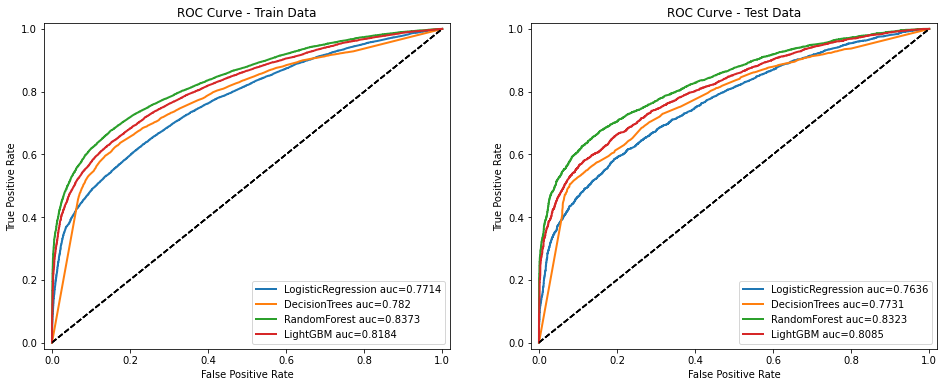

In [33]:
clf_tool.plot_roc_curve()

___
* _Plotting Confusion Matrix for each classifier (train and test)_
___

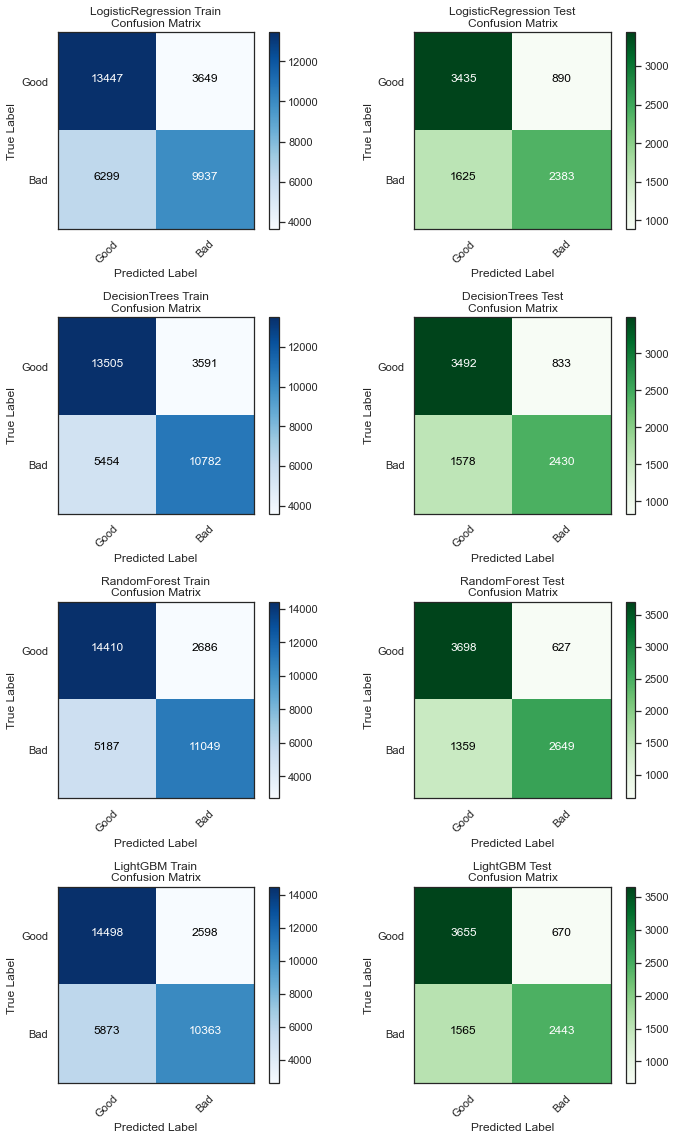

In [34]:
clf_tool.plot_confusion_matrix(classes=['Good', 'Bad'])

___
* _Looking at the feature importance of a specific model_
___

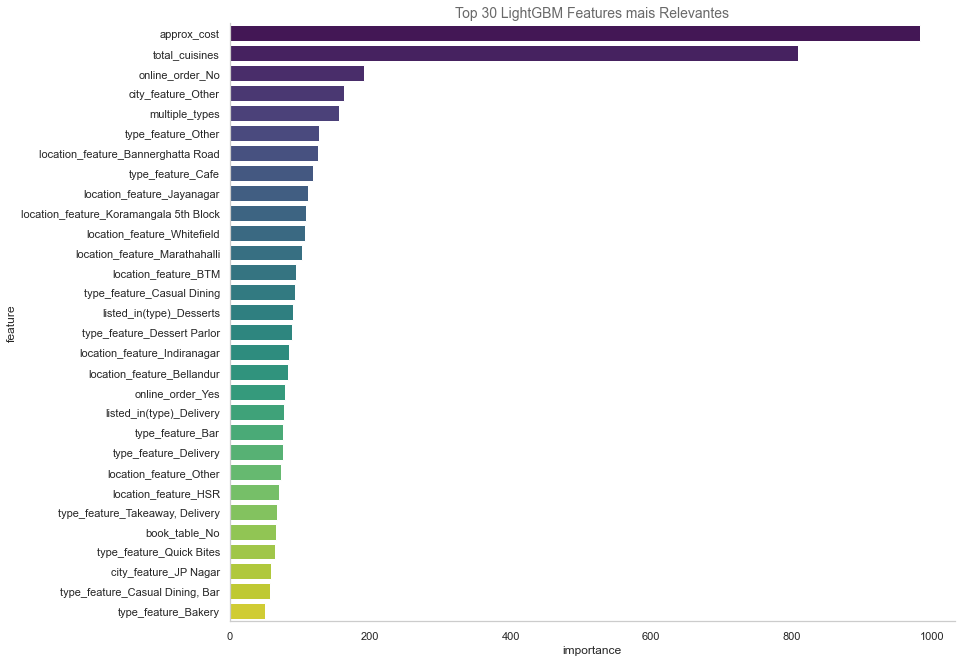

In [35]:
fig, ax = plt.subplots(figsize=(13, 11))
forest_feature_importance = clf_tool.feature_importance_analysis(model_features, specific_model='LightGBM', ax=ax)
plt.show()

___
* _Looking at score (proba) distribution for a specific model_
___

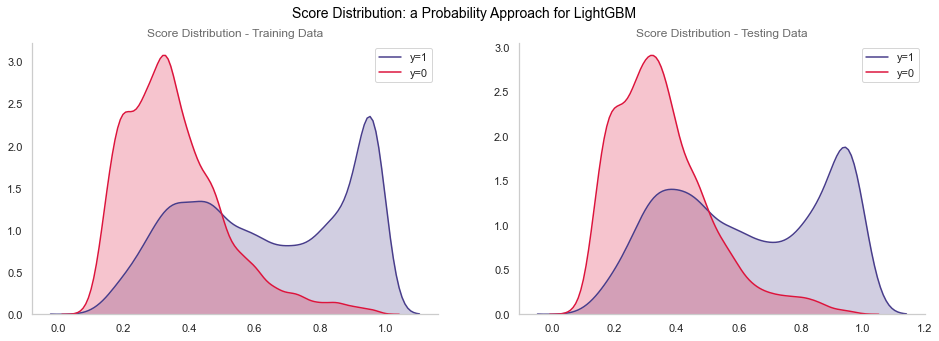

In [36]:
clf_tool.plot_score_distribution('LightGBM', shade=True)

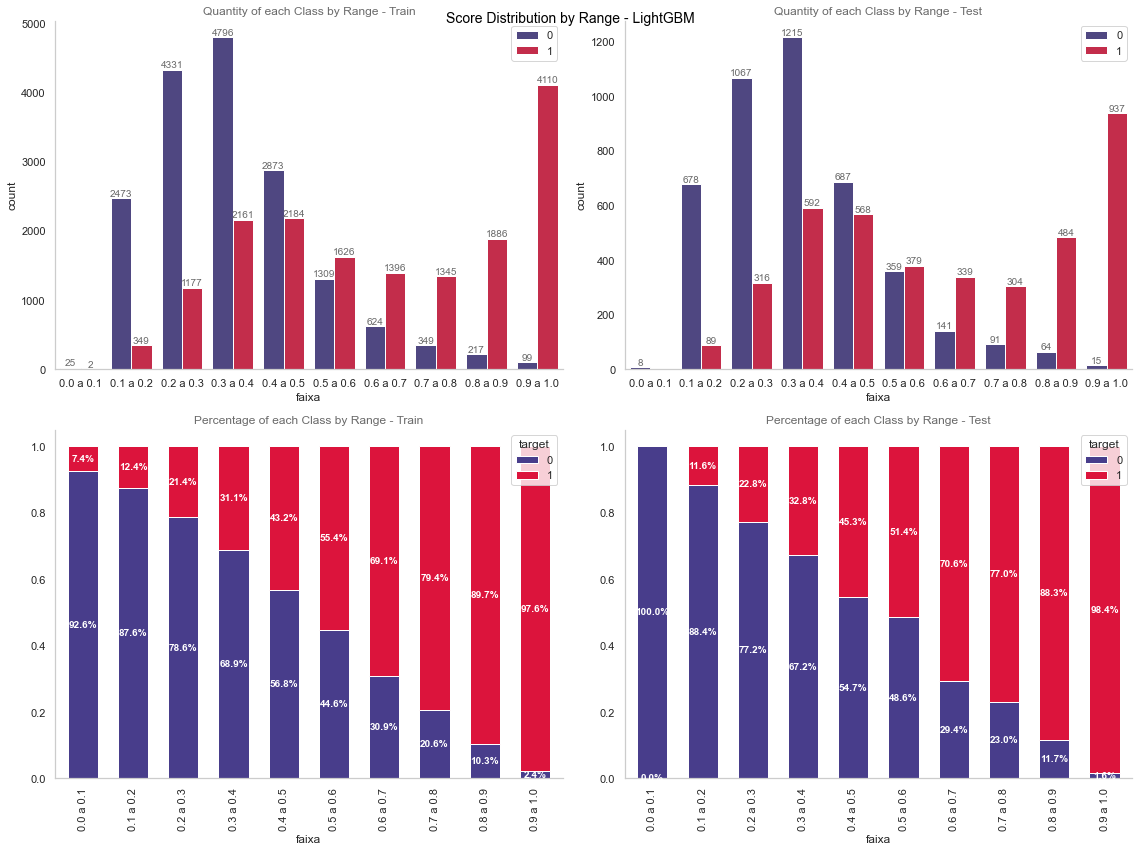

In [37]:
clf_tool.plot_score_bins('LightGBM', bin_range=0.1)

___
* _Using shap analysis for evaluating features patterns_
___

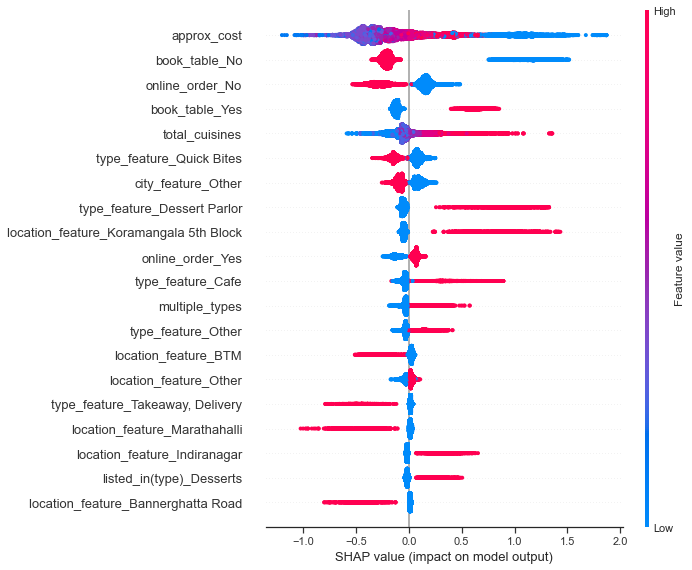

In [38]:
# Returning the LightGBM model and applying shap value
model = clf_tool.classifiers_info['LightGBM']['estimator']
explainer = shap.TreeExplainer(model)
df_X_train_prep = pd.DataFrame(X_train_prep, columns=model_features)
shap_values = explainer.shap_values(df_X_train_prep)

# Plotting a summary plot using shap
shap.summary_plot(shap_values[1], df_X_train_prep)

# Conclusion + Production Script

Well, after going trough all the tasks we can conclude that it was possible to predict the success (in terms of rate) for new restaurants put in Zomato service. This is very interesting for business areas to evaluate the main concepts of restaurants and customers preferences in Bengaluru region. With this information, it's clearly possible to take a look at restaurant's features before launching it! The business men and the customers would appreciate it!

So, thinking of a developer way, it would be nice to code this as a production script that receives data from new restaurants monthly (or daily if you wish) and returns the "success score probability". For this to be true, we have to encapsulate a bunch of steps, like building (or reading) a complete pipeline in a pkl format, building (or reading) a classification model also in pkl format and, by the end, applying the `predict` or `predict_proba` methods for scoring the new data. Let's simulate it.

In [50]:
# Applying the full pipeline into new restaurants
new_restaurants_prep = full_pipeline.fit_transform(new_restaurants.drop('target', axis=1))

# Returning the best model and predicting the rate for new restaurants
model = clf_tool.classifiers_info['LightGBM']['estimator']
y_pred = model.predict(new_restaurants_prep)
y_probas = model.predict_proba(new_restaurants_prep)
y_scores = y_probas[:, 1]

# Labelling new data
new_restaurants['success_class'] = y_pred
new_restaurants['success_proba'] = y_scores
new_restaurants.head()

online_order book_table listed_in(type)  approx_cost  multiple_types  \
72           No         No        Delivery        150.0               1   
75           No         No        Delivery        500.0               2   
84           No         No        Delivery        100.0               1   
90           No         No        Delivery        500.0               1   
91           No         No        Delivery        400.0               2   

    total_cuisines location_feature city_feature        type_feature  target  \
72               1            Other        Other         Quick Bites       0   
75               2            Other        Other  Takeaway, Delivery       0   
84               2            Other        Other         Quick Bites       0   
90               2            Other        Other            Delivery       0   
91               1            Other        Other  Takeaway, Delivery       0   

    success_class  success_proba  
72              0       0.181576  
75              0       0.261440  
84              0       0.175846  
90              0       0.243493  
91              0       0.219232

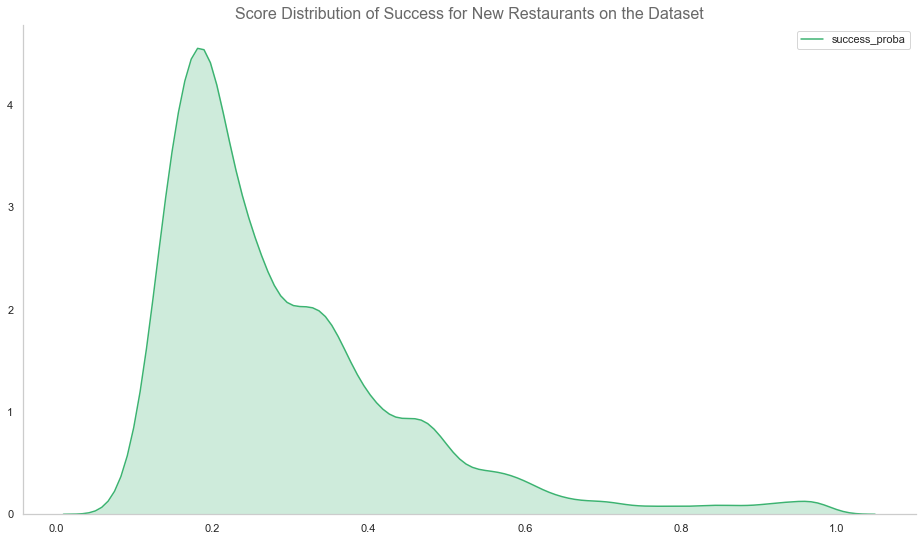

In [54]:
# Looking at the score distribution for new restaurants
fig, ax = plt.subplots(figsize=(16, 9))
sns.kdeplot(new_restaurants['success_proba'], ax=ax, shade=True, color='mediumseagreen')
format_spines(ax, right_border=False)
ax.set_title('Score Distribution of Success for New Restaurants on the Dataset', size=16, color='dimgrey')
plt.show()

___
*What are the most promissor restaurants (with the highest proba score)?*
___

In [75]:
# Ordering new restaurants by proba score
new_restaurants_data = new_restaurants.reset_index().merge(raw_data.reset_index()[['name', 'index']], how='left', on='index')
top_new = new_restaurants_data.sort_values(by='success_proba', ascending=False).head(10)
top_new = top_new.loc[:, ['name', 'success_proba', 'online_order', 'book_table', 'listed_in(type)',
                          'approx_cost', 'multiple_types', 'total_cuisines', 'location_feature',
                          'city_feature', 'type_feature']]
top_new

name  success_proba online_order  \
2302                          Biergarten       0.983087           No   
2198                          Biergarten       0.983087           No   
4283  The Coastal Crew by Fujian on 24th       0.983000          Yes   
3941                   Inntense Restobar       0.982788           No   
2298                          Biergarten       0.982334           No   
3937                   Inntense Restobar       0.980683           No   
8480                           By Chance       0.977606           No   
6483             Cheers Pub Bar & Restro       0.977378           No   
8958                   Inntense Restobar       0.977226           No   
6294             Cheers Pub Bar & Restro       0.976601           No   

     book_table     listed_in(type)  approx_cost  multiple_types  \
2302        Yes       Pubs and bars          2.1               2   
2198        Yes            Dine-out          2.1               2   
4283        Yes            Dine-out          1.1               2   
3941        Yes       Pubs and bars          1.6               2   
2298        Yes  Drinks & nightlife          2.1               2   
3937        Yes  Drinks & nightlife          1.6               2   
8480        Yes            Dine-out          1.1               2   
6483        Yes       Pubs and bars          1.1               2   
8958        Yes       Pubs and bars          1.6               2   
6294        Yes            Dine-out          1.1               2   

      total_cuisines       location_feature           city_feature  \
2302               7  Koramangala 5th Block                    BTM   
2198               7  Koramangala 5th Block                    BTM   
4283               5               JP Nagar              Jayanagar   
3941               5            Indiranagar            Indiranagar   
2298               7  Koramangala 5th Block                    BTM   
3937               5            Indiranagar            Indiranagar   
8480               4                  Other                MG Road   
6483               5                  Other  Koramangala 5th Block   
8958               4            Indiranagar                  Other   
6294               5                  Other  Koramangala 5th Block   

            type_feature  
2302               Other  
2198               Other  
4283  Casual Dining, Bar  
3941               Other  
2298               Other  
3937               Other  
8480               Other  
6483               Other  
8958               Other  
6294               Other

___
*What are the restaurants with the lowest likely probability? (the ones that maybe customers won't order for Zomato)*
___

In [77]:
# Ordering new restaurants by proba score
bottom_new = new_restaurants_data.sort_values(by='success_proba', ascending=True).head(10)
bottom_new = bottom_new.loc[:, ['name', 'success_proba', 'online_order', 'book_table', 'listed_in(type)',
                          'approx_cost', 'multiple_types', 'total_cuisines', 'location_feature',
                          'city_feature', 'type_feature']]
bottom_new

name  success_proba online_order book_table  \
4582                 Sapid       0.074717           No         No   
4590             Jugz Cafe       0.074717           No         No   
4614           Ambur Hotel       0.081021           No         No   
231           Kitchen King       0.082064           No         No   
4770      Kedia's Fun Food       0.082308           No         No   
4774  Priyadharshini Hotel       0.082308           No         No   
1890                 Sapid       0.082623           No         No   
435           Kitchen King       0.083008           No         No   
1939          Kitchen King       0.083815           No         No   
2253          Kitchen King       0.084821           No         No   

     listed_in(type)  approx_cost  multiple_types  total_cuisines  \
4582        Delivery        250.0               1               1   
4590        Delivery        250.0               1               1   
4614        Delivery        250.0               1               1   
231         Delivery        250.0               1               3   
4770        Dine-out        200.0               1               3   
4774        Dine-out        200.0               1               3   
1890        Delivery        250.0               1               1   
435         Dine-out        250.0               1               3   
1939        Delivery        250.0               1               3   
2253        Dine-out        250.0               1               3   

       location_feature city_feature type_feature  
4582  Bannerghatta Road     JP Nagar     Delivery  
4590  Bannerghatta Road     JP Nagar     Delivery  
4614  Bannerghatta Road     JP Nagar  Quick Bites  
231   Bannerghatta Road        Other  Quick Bites  
4770  Bannerghatta Road     JP Nagar  Quick Bites  
4774  Bannerghatta Road     JP Nagar  Quick Bites  
1890  Bannerghatta Road          BTM     Delivery  
435   Bannerghatta Road        Other  Quick Bites  
1939  Bannerghatta Road          BTM  Quick Bites  
2253  Bannerghatta Road          BTM  Quick Bites

**Well, that's all folks!**

We finally finished our job here and we can be very excited of what we've done. With this implementation it was possible to delivery useful information for Business areas and also for Zomato customers on choosing the best restaurant for ordering (specially the new ones). This is an example of what predictive models can do in practice.

Thank you for going until now with me and, if you liked, **please UPVOTE this kernel** and leave a comment below.